In [1]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

In [3]:
ds_TSG = xr.open_dataset('data/03_processed/tsg_ORCHESTRA_return/b1903933_gridded_return.nc')

In [4]:
ds_TSG['distance_cum'] = ds_TSG.distance_cum * units.m

In [5]:
ds_TSG['bx'] = (mpcalc.gradient(ds_TSG.b, axes=['distance_cum']))[0]/2 #creates a tuple, we have to select the first element to get the DataArray (that's why the [0])


In [6]:
ds_ssh_SO = xr.open_mfdataset('./data/04_models/geo_fronts/adt_gradient/*.nc')

In [7]:
ds_ssh_drake = ds_ssh_SO.sel(longitude = slice(-70, -40), latitude = slice(-70,-50)).sel(time=slice('2017-12-04','2017-12-06')).mean('time')

In [8]:
ds_TSG

<xarray.Dataset>
Dimensions:                 (distance_cum: 709)
Coordinates:
    lat                     (distance_cum) float64 ...
    lon                     (distance_cum) float64 ...
    depth                   (distance_cum) float64 ...
  * distance_cum            (distance_cum) float64 0.0 500.0 ... 3.54e+05
Data variables: (12/23)
    crs                     (distance_cum) float64 ...
    SDN_EDMO_CODE           (distance_cum) float64 ...
    SDN_BOT_DEPTH           (distance_cum) float64 ...
    POSITION_SEADATANET_QC  (distance_cum) float64 ...
    DEPTH_SEADATANET_QC     (distance_cum) float64 ...
    TIME_SEADATANET_QC      (distance_cum) float64 ...
    ...                      ...
    pressure                (distance_cum) float64 ...
    SA                      (distance_cum) float64 ...
    CT                      (distance_cum) float64 ...
    rho_pot                 (distance_cum) float64 ...
    b                       (distance_cum) float64 0.0002576 ... 0.004972
    bx                      (distance_cum) float64 <Quantity([ 2.80966644e-08...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [9]:
ds_ssh_drake

<xarray.Dataset>
Dimensions:            (latitude: 80, nv: 2, longitude: 120)
Coordinates:
  * latitude           (latitude) float32 -69.88 -69.62 -69.38 ... -50.38 -50.12
  * nv                 (nv) int32 0 1
  * longitude          (longitude) float32 -69.88 -69.62 ... -40.38 -40.12
Data variables: (12/14)
    crs                float64 dask.array<chunksize=(), meta=np.ndarray>
    lat_bnds           (latitude, nv) float32 dask.array<chunksize=(80, 2), meta=np.ndarray>
    lon_bnds           (longitude, nv) float32 dask.array<chunksize=(120, 2), meta=np.ndarray>
    err                (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt                (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    ugos               (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    ...                 ...
    ugosa              (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    vgosa              (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_calc           (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_mer       (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_mer_calc  (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>
    adt_grad_radial    (latitude, longitude) float64 dask.array<chunksize=(80, 120), meta=np.ndarray>

In [27]:
ds_ssh_drake_interp = ds_ssh_drake.interp(longitude=ds_TSG.lon, latitude=ds_TSG.lat, method="nearest")

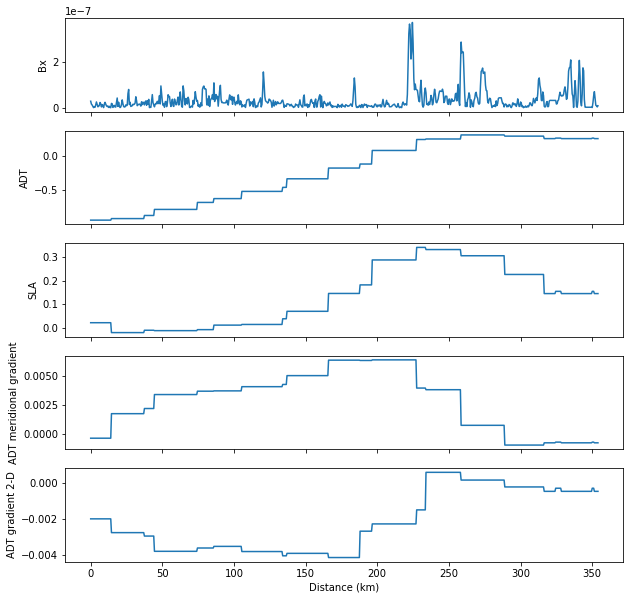

In [29]:
fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=5, figsize=(10,10), sharex=True)
x = ds_ssh_drake_interp.distance_cum/1000

ax0.plot(x, np.abs(ds_TSG.bx))
ax0.set_ylabel('Bx')

ax1.plot(x, ds_ssh_drake_interp.adt)
ax1.set_ylabel('ADT')

ax2.plot(x, ds_ssh_drake_interp.sla)
ax2.set_ylabel('SLA')

ax3.plot(x, ds_ssh_drake_interp.adt_grad_mer)
ax3.set_ylabel('ADT meridional gradient')
 
ax4.plot(x, ds_ssh_drake_interp.adt_grad_radial)
ax4.set_ylabel('ADT gradient 2-D')
ax4.set_xlabel('Distance (km)')

plt.savefig(r'results/analysis/orchestra_2/TSG_SSH_colocated', bbox_inches='tight', format='png')


In [12]:
ds_ssh_drake_interp.sla.to_dataframe()


,longitude,latitude,lat,lon,depth,sla
distance_cum,,,,,,
0.0,-56.554581,-57.871395,-57.871395,-56.554581,6.5,0.021933
500.0,-56.557174,-57.867115,-57.867115,-56.557174,6.5,0.021933
1000.0,-56.559760,-57.862834,-57.862834,-56.559760,6.5,0.021933
1500.0,-56.562284,-57.858543,-57.858543,-56.562284,6.5,0.021933
2000.0,-56.564794,-57.854249,-57.854249,-56.564794,6.5,0.021933
...,...,...,...,...,...,...
352000.0,-57.999071,-55.018200,-55.018200,-57.999071,6.5,0.145733
352500.0,-57.998402,-55.022680,-55.022680,-57.998402,6.5,0.145733
353000.0,-57.997716,-55.027159,-55.027159,-57.997716,6.5,0.145733


In [13]:
df_bx = ds_TSG['bx'].to_dataframe()
df_bx = df_bx.drop(['lat','lon','depth'],1)

df_sla = ds_ssh_drake_interp.sla.to_dataframe()
df_sla = df_sla.drop(['latitude','longitude','depth'],1)

df_adt_grad_mer = ds_ssh_drake_interp.adt_grad_mer.to_dataframe()
df_adt_grad_mer = df_adt_grad_mer.drop(['lat','lon','latitude','longitude','depth'],1)

df_adt_grad_radial = ds_ssh_drake_interp.adt_grad_radial.to_dataframe()
df_adt_grad_radial = df_adt_grad_radial.drop(['lat','lon','latitude','longitude','depth'],1)

df_adt = ds_ssh_drake_interp.adt.to_dataframe()
df_adt = df_adt.drop(['lat','lon','latitude','longitude','depth'],1)

C:\Users\gian_\AppData\Local\Temp/ipykernel_15768/586839460.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_bx = df_bx.drop(['lat','lon','depth'],1)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15768/586839460.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sla = df_sla.drop(['latitude','longitude','depth'],1)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15768/586839460.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_adt_grad_mer = df_adt_grad_mer.drop(['lat','lon','latitude','longitude','depth'],1)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15768/586839460.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_adt_grad_rad

In [14]:
df_joined = df_bx.join(df_sla).join(df_adt_grad_mer).join(df_adt_grad_radial).join(df_adt)

In [15]:
df_joined

,bx,lat,lon,sla,adt_grad_mer,adt_grad_radial,adt
distance_cum,,,,,,,
0.0,2.809666e-08,-57.871395,-56.554581,0.021933,-0.000371,-0.001967,-0.934233
500.0,1.564599e-08,-57.867115,-56.557174,0.021933,-0.000371,-0.001967,-0.934233
1000.0,1.177978e-08,-57.862834,-56.559760,0.021933,-0.000371,-0.001967,-0.934233
1500.0,5.770172e-09,-57.858543,-56.562284,0.021933,-0.000371,-0.001967,-0.934233
2000.0,-1.699014e-10,-57.854249,-56.564794,0.021933,-0.000371,-0.001967,-0.934233
...,...,...,...,...,...,...,...
352000.0,-3.804955e-08,-55.018200,-57.999071,0.145733,-0.000772,-0.000438,0.256600
352500.0,1.045914e-08,-55.022680,-57.998402,0.145733,-0.000772,-0.000438,0.256600
353000.0,8.129480e-09,-55.027159,-57.997716,0.145733,-0.000772,-0.000438,0.256600


In [ ]:
def load_ACC_fronts(path, date, front_name):
    '''
    front_name (str): one of the following: PF, SAF_N, SAF. Has to go in pair with the corresponding path.
    '''

    from netCDF4 import Dataset
    latitude = Dataset(path).variables[front_name] #extract the latitude from the dataset
    longitude = Dataset(path).variables['longitude'] #extract the longitude from the dataset
    time = Dataset(path).variables['time'] #extract the time from the dataset

    days = (np.datetime64(date) - np.datetime64('1950-01-01')).astype(int) #calculate the numbers of days until your required date (because of time format)
    closest = utils.utils.closest_value(time, days) #closest day in the dataset to the date
    index = np.where(np.array(time) == int(closest)) #index of the day in the dataset

    lat_name = 'latitude_' + front_name #naming of the frontal latitude
    lon_name = 'longitude_' + front_name #naming of the frontal longitude

    globals()[lat_name] = latitude[index][0] #final selection (and globalisation) of the latitude.
    globals()[lon_name] = longitude[index][0] #final selection (and globalisation) of the longitude.
    
load_ACC_fronts('data/01_raw/SALLEE2008_SO_FRONTS/CTOH_PolarFront_weekly_1993_2018.nc', '2017-12-05', 'PF')
load_ACC_fronts('data/01_raw/SALLEE2008_SO_FRONTS/CTOH_NorthernSubantarcticFront_weekly_1993_2018.nc', '2017-12-05', 'SAF_N')
load_ACC_fronts('data/01_raw/SALLEE2008_SO_FRONTS/CTOH_SubantarcticFront_weekly_1993_2018.nc', '2017-12-05', 'SAF')

masked_array(data=[0.125, 0.375, 0.625, ...,   nan,   nan,   nan],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
PF = pd.DataFrame()
PF['longitude'] = utils.utils.convert_lon_center(longitude_PF.data,'Atlantic')
PF['latitude'] = latitude_PF.data
PF = PF.sort_values('longitude').dropna().reset_index(drop=True)

PF_lat_TSG = np.float(PF.where(PF['longitude'] == utils.utils.closest_value(PF['longitude'],-57.41651212)).dropna()['latitude'])

PF_TSG = df_joined[df_joined['lat'] == utils.utils.closest_value(np.array(df_joined['lat']),PF_lat_TSG)].index.values

c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d00_utils\utils.py:39: RuntimeWarning: invalid value encountered in remainder
  longitude = ((values + 180) % 360) - 180
C:\Users\gian_\AppData\Local\Temp/ipykernel_21892/2783516640.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  PF_lat_TSG = np.float(PF.where(PF['longitude'] == utils.utils.closest_value(PF['longitude'],-57.41651212)).dropna()['latitude'])


In [ ]:
SAF_N = pd.DataFrame()
SAF_N['longitude'] = utils.utils.convert_lon_center(longitude_SAF_N.data,'Atlantic')
SAF_N['latitude'] = latitude_SAF_N.data
SAF_N = SAF_N.sort_values('longitude').dropna().reset_index(drop=True)
SAF_N_lat_TSG = SAF_N.where(SAF_N['longitude'] == utils.utils.closest_value(SAF_N['longitude'],-57.41651212)).dropna().iloc[2]['latitude']
SAF_N_TSG = df_joined[df_joined['lat'] == utils.utils.closest_value(np.array(df_joined['lat']),SAF_N_lat_TSG)].index.values

In [ ]:
SAF = pd.DataFrame()
SAF['longitude'] = utils.utils.convert_lon_center(longitude_SAF.data,'Atlantic')
SAF['latitude'] = latitude_SAF.data
SAF = SAF.sort_values('longitude').dropna().reset_index(drop=True)
SAF_lat_TSG = SAF.where(SAF['longitude'] == utils.utils.closest_value(SAF['longitude'],-57.41651212)).dropna().iloc[1]['latitude']
SAF_TSG = df_joined[df_joined['lat'] == utils.utils.closest_value(np.array(df_joined['lat']),SAF_lat_TSG)].index.values

In [ ]:
SAF.where(SAF['longitude'] == utils.utils.closest_value(SAF['longitude'],-57.41651212)).dropna().iloc[1]['latitude']

-56.274967

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(12,8), sharex=True)
x0 = df_joined.lat
y0 = np.abs(df_bx)
ax0.plot(x0, y0)

x1 = ds_TSG.distance_cum
y1 = np.abs(df_bx.rolling(5).mean())
ax1.plot(x1, y1)

x2 = ds_TSG.distance_cum
y2 = np.abs(df_bx.rolling(10).mean())
ax2.plot(x2, y2)

x3 = ds_TSG.distance_cum
y3 = np.abs(df_bx.rolling(20).mean())
ax3.plot(x3, y3)

axes = [ax0,ax1,ax2,ax3]
for ax in axes:
    ax.vlines(PF_TSG, df_bx['bx'].min(), df_bx['bx'].max(), color='red', linewidth=0.5, linestyle='-.')
    ax.vlines(SAF_N_TSG, df_bx['bx'].min(), df_bx['bx'].max(), color='red', linewidth=0.5, linestyle='-.')

In [ ]:
df_joined

,bx,lat,lon,sla,adt_grad_mer,adt_grad_radial
distance_cum,,,,,,
0.0,2.809666e-08,-57.871395,-56.554581,0.021933,-0.000371,-0.001967
500.0,1.564599e-08,-57.867115,-56.557174,0.021933,-0.000371,-0.001967
1000.0,1.177978e-08,-57.862834,-56.559760,0.021933,-0.000371,-0.001967
1500.0,5.770172e-09,-57.858543,-56.562284,0.021933,-0.000371,-0.001967
2000.0,-1.699014e-10,-57.854249,-56.564794,0.021933,-0.000371,-0.001967
...,...,...,...,...,...,...
352000.0,-3.804955e-08,-55.018200,-57.999071,0.145733,-0.000772,-0.000438
352500.0,1.045914e-08,-55.022680,-57.998402,0.145733,-0.000772,-0.000438
353000.0,8.129480e-09,-55.027159,-57.997716,0.145733,-0.000772,-0.000438


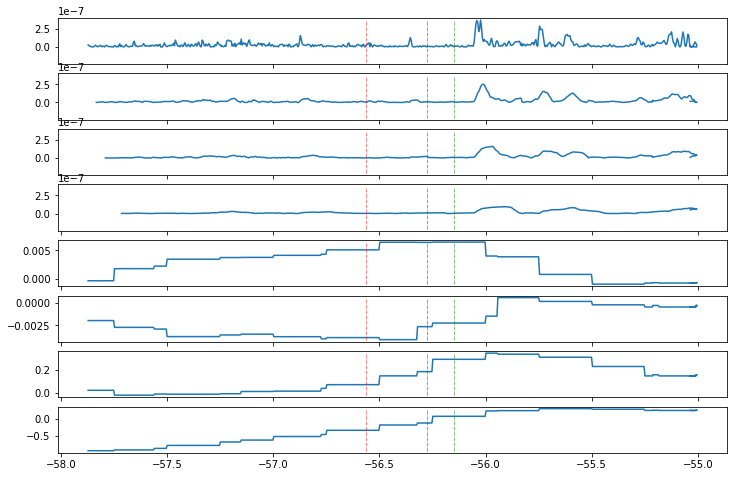

In [ ]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, figsize=(12,8), sharex=True)
x0 = df_joined.lat
y0 = np.abs(df_bx)
ax0.plot(x0, y0)

x1 = df_joined.lat
y1 = np.abs(df_bx.rolling(10).mean())
ax1.plot(x1, y1)

x2 = df_joined.lat
y2 = np.abs(df_bx.rolling(20).mean())
ax2.plot(x2, y2)

x3 = df_joined.lat
y3 = np.abs(df_bx.rolling(40).mean())
ax3.plot(x3, y3)

x4 = df_joined.lat
y4 = df_joined.adt_grad_mer
ax4.plot(x4, y4)

x5 = df_joined.lat
y5 = df_joined.adt_grad_radial
ax5.plot(x5, y5)

x6 = df_joined.lat
y6 = df_joined.sla
ax6.plot(x6, y6)

x7 = df_joined.lat
y7 = df_joined.adt
ax7.plot(x7, y7)

axes = [ax0,ax1,ax2,ax3]
for ax in axes:
    ax.vlines(PF_lat_TSG, df_bx['bx'].min(), df_bx['bx'].max(), color='red', linewidth=0.5, linestyle='-.')
    ax.vlines(SAF_N_lat_TSG, df_bx['bx'].min(), df_bx['bx'].max(), color='green', linewidth=0.5, linestyle='-.')
    ax.vlines(SAF_lat_TSG, df_bx['bx'].min(), df_bx['bx'].max(), color='purple', linewidth=0.5, linestyle='-.')
    
ax4.vlines(PF_lat_TSG, df_joined['adt_grad_mer'].min(), df_joined['adt_grad_mer'].max(), color='red', linewidth=0.5, linestyle='-.')
ax4.vlines(SAF_N_lat_TSG, df_joined['adt_grad_mer'].min(), df_joined['adt_grad_mer'].max(), color='green', linewidth=0.5, linestyle='-.')
ax4.vlines(SAF_lat_TSG, df_joined['adt_grad_mer'].min(), df_joined['adt_grad_mer'].max(), color='purple', linewidth=0.5, linestyle='-.')

ax5.vlines(PF_lat_TSG, df_joined['adt_grad_radial'].min(), df_joined['adt_grad_radial'].max(), color='red', linewidth=0.5, linestyle='-.')
ax5.vlines(SAF_N_lat_TSG, df_joined['adt_grad_radial'].min(), df_joined['adt_grad_radial'].max(), color='green', linewidth=0.5, linestyle='-.')
ax5.vlines(SAF_lat_TSG, df_joined['adt_grad_radial'].min(), df_joined['adt_grad_radial'].max(), color='purple', linewidth=0.5, linestyle='-.')

ax6.vlines(PF_lat_TSG, df_joined['sla'].min(), df_joined['sla'].max(), color='red', linewidth=0.5, linestyle='-.')
ax6.vlines(SAF_N_lat_TSG, df_joined['sla'].min(), df_joined['sla'].max(), color='green', linewidth=0.5, linestyle='-.')
ax6.vlines(SAF_lat_TSG, df_joined['sla'].min(), df_joined['sla'].max(), color='purple', linewidth=0.5, linestyle='-.')

ax7.vlines(PF_lat_TSG, df_joined['adt'].min(), df_joined['adt'].max(), color='red', linewidth=0.5, linestyle='-.')
ax7.vlines(SAF_N_lat_TSG, df_joined['adt'].min(), df_joined['adt'].max(), color='green', linewidth=0.5, linestyle='-.')
ax7.vlines(SAF_lat_TSG, df_joined['adt'].min(), df_joined['adt'].max(), color='purple', linewidth=0.5, linestyle='-.')

In [ ]:
covs = (
    df_corr[['bx','sla']]
    .rolling(window=5)
    .corr(df_corr[['bx','sla']])
)
covs

,bx,sla
distance_cum,,
0.0,NaN,NaN
500.0,NaN,NaN
1000.0,NaN,NaN
1500.0,NaN,NaN
2000.0,1.0,NaN
...,...,...
352000.0,1.0,1.0
352500.0,1.0,1.0
353000.0,1.0,1.0


In [ ]:
covs

,,bx
distance_cum,,
0.0,sla,NaN
500.0,sla,NaN
1000.0,sla,NaN
1500.0,sla,NaN
2000.0,sla,NaN
...,...,...
352000.0,sla,-2.237193e-11
352500.0,sla,-2.508957e-11
353000.0,sla,-2.706947e-11


In [ ]:
np.cov(np.array(ds_TSG.bx.values), np.array(ds_ssh_drake_interp.adt.values))

array([[3.20565941e-15, 2.01348259e-10],
       [2.01348259e-10, 2.07526842e-01]])

In [ ]:
np.corrcoef(np.array(ds_TSG.bx.values), np.array(ds_ssh_drake_interp.adt.values))

NameError: name 'np' is not defined